In [898]:
# !pip install imbalanced-learn
# !pip install seaborn

In [899]:
import boto3
import pandas as pd
from datetime import datetime

In [900]:
# Specify your DynamoDB table details
table_name = 'DeviceTimeStamp-zvvc26kofnethfd47fmdbb2skm-dev'

# Create a DynamoDB client
dynamodb = boto3.client('dynamodb')
# Scan the DynamoDB table to retrieve all data

response = dynamodb.scan(TableName=table_name)
items = response['Items']

# Convert DynamoDB items to a Pandas DataFrame
df = pd.DataFrame(items)

# Function to convert DynamoDB item to a dictionary of values
def parse_dynamodb_item(item):
    return {key: list(value.values())[0] for key, value in item.items()} 

# Apply the parsing function to each row in the DataFrame
df = df.apply(parse_dynamodb_item, axis=1).apply(pd.Series)  # Convert Series to DataFrame

# Convert timestamp strings to datetime objects if the 'timestamp' column exists
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%dT%H:%M:%S.%fZ')

# Print the cleaned DataFrame
df

,__typename,deviceID,userID,updatedAt,eventStatus,timestamp,createdAt,owner,id
0,DeviceTimeStamp,6y2e0q34-992e-901d-2r24-4t99e27q9789,aye06b84-ceb1-4f65-8407-13cd12663818,2023-09-22T07:00:00.001Z,False,2023-09-22 07:00:00.001,2023-09-22T07:00:00.001Z,b3f06b84-ceb1-4f65-8407-13cd12663818::b3f06b84...,jkl4b9d8-dbf4-44fa-b3f8-c01dd3ce2b61
1,DeviceTimeStamp,111j6h66-938q-278r-8e24-4t99e27q8371,fat06b84-ceb1-4f65-8407-13cd12663818,2023-10-18T23:00:00.001Z,True,2023-10-18 23:00:00.001,2023-10-18T23:00:00.001Z,fat06b84-ceb1-4f65-8407-13cd12663818::fat06b84...,jkl4b9d8-dbf4-44fa-b3f8-c01dd3ce2j67
2,DeviceTimeStamp,6y2e0q34-992e-901d-2r24-4t99e27q9789,aye06b84-ceb1-4f65-8407-13cd12663818,2023-10-15T23:10:00.001Z,True,2023-10-15 23:10:00.001,2023-10-15T23:10:00.001Z,b3f06b84-ceb1-4f65-8407-13cd12663818::b3f06b84...,jkl4b9d8-dbf4-44fa-b3f8-c01dd3ce2f65
3,DeviceTimeStamp,ab4454c7-1d75-4328-af9c-f03a12ccea2b,b3f06b84-ceb1-4f65-8407-13cd12663818,2023-10-03T07:47:00.001Z,False,2023-10-03 07:47:00.001,2023-10-03T07:47:00.001Z,b3f06b84-ceb1-4f65-8407-13cd12663818::b3f06b84...,jkl4b9d8-dbf4-44fa-b3f8-c01dd3ce2c08
4,DeviceTimeStamp,111j6h66-938q-278r-8e24-4t99e27q8371,fat06b84-ceb1-4f65-8407-13cd12663818,2023-09-14T07:49:00.001Z,False,2023-09-14 07:49:00.001,2023-09-14T07:49:00.001Z,fat06b84-ceb1-4f65-8407-13cd12663818::fat06b84...,jkl4b9d8-dbf4-44fa-b3f8-c01dd3ce2b41
...,...,...,...,...,...,...,...,...,...
376,DeviceTimeStamp,111j6h66-938q-278r-8e24-4t99e27q8371,fat06b84-ceb1-4f65-8407-13cd12663818,2023-09-22T07:00:00.001Z,False,2023-09-22 07:00:00.001,2023-09-22T07:00:00.001Z,fat06b84-ceb1-4f65-8407-13cd12663818::fat06b84...,jkl4b9d8-dbf4-44fa-b3f8-c01dd3ce2d40
377,DeviceTimeStamp,7a2e3c32-888a-446c-9d15-8f79f40a7331,b3f06b84-ceb1-4f65-8407-13cd12663818,2023-10-07T07:00:00.001Z,False,2023-10-07 07:00:00.001,2023-10-07T07:00:00.001Z,b3f06b84-ceb1-4f65-8407-13cd12663818::b3f06b84...,jkl4b9d8-dbf4-44fa-b3f8-c01dd3ce2d37
378,DeviceTimeStamp,111j6h66-938q-278r-8e24-4t99e27q8371,fat06b84-ceb1-4f65-8407-13cd12663818,2023-10-08T21:15:00.001Z,True,2023-10-08 21:15:00.001,2023-10-08T21:15:00.001Z,fat06b84-ceb1-4f65-8407-13cd12663818::fat06b84...,jkl4b9d8-dbf4-44fa-b3f8-c01dd3ce2h43
379,DeviceTimeStamp,9c1j6h66-938q-278r-8e24-4t99e27q8371,b3f06b84-ceb1-4f65-8407-13cd12663818,2023-09-15T07:23:00.001Z,False,2023-09-15 07:23:00.001,2023-09-15T07:23:00.001Z,b3f06b84-ceb1-4f65-8407-13cd12663818::b3f06b84...,hij6d759-1240-4d42-ab68-827b9bf22acd


In [901]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Handle missing values (if any) - for example, drop rows with missing values
df = df.dropna()

Missing Values:
 __typename     0
deviceID       0
userID         0
updatedAt      0
eventStatus    0
timestamp      0
createdAt      0
owner          0
id             0
dtype: int64


In [902]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Specify columns to be label encoded
columns_to_encode = ['userID', 'deviceID']

# Apply label encoding to the specified columns
for column in columns_to_encode:
    # Check if the column exists in the DataFrame and has dtype 'object'
    if column in df.columns and df[column].dtype == 'object':
        # Fit and transform the column with label encoding
        df[column] = label_encoder.fit_transform(df[column])

# Display the DataFrame after label encoding
print(df.head())


        __typename  deviceID  userID                 updatedAt  eventStatus  \
0  DeviceTimeStamp         1       0  2023-09-22T07:00:00.001Z        False   
1  DeviceTimeStamp         0       2  2023-10-18T23:00:00.001Z         True   
2  DeviceTimeStamp         1       0  2023-10-15T23:10:00.001Z         True   
3  DeviceTimeStamp         4       1  2023-10-03T07:47:00.001Z        False   
4  DeviceTimeStamp         0       2  2023-09-14T07:49:00.001Z        False   

                timestamp                 createdAt  \
0 2023-09-22 07:00:00.001  2023-09-22T07:00:00.001Z   
1 2023-10-18 23:00:00.001  2023-10-18T23:00:00.001Z   
2 2023-10-15 23:10:00.001  2023-10-15T23:10:00.001Z   
3 2023-10-03 07:47:00.001  2023-10-03T07:47:00.001Z   
4 2023-09-14 07:49:00.001  2023-09-14T07:49:00.001Z   

                                               owner  \
0  b3f06b84-ceb1-4f65-8407-13cd12663818::b3f06b84...   
1  fat06b84-ceb1-4f65-8407-13cd12663818::fat06b84...   
2  b3f06b84-ceb1-4f65-8407

In [903]:
# Specify columns to keep
selected_columns = ['userID', 'deviceID', 'eventStatus', 'timestamp']

# Create a new DataFrame with only the selected columns
df_selected = df[selected_columns]

print(df_selected)
df_selected['hours'] = df['timestamp'].dt.hour
df_selected['minutes'] = df['timestamp'].dt.minute
df_selected['seconds'] = df['timestamp'].dt.second

df_selected.drop('timestamp',axis=1) #= df_selected['userID', 'deviceID', 'eventStatus','hours','minutes']
# Separate records into 'true' and 'false' using df_selected
# df_true_selected = df_selected[df_selected['eventStatus'] == True]
# df_false_selected = df_selected[df_selected['eventStatus'] == False]

# # Display the DataFrames
# print("True Records (Selected Columns):")
# print(df_true_selected)

# print("\nFalse Records (Selected Columns):")
# print(df_false_selected)



     userID  deviceID  eventStatus               timestamp
0         0         1        False 2023-09-22 07:00:00.001
1         2         0         True 2023-10-18 23:00:00.001
2         0         1         True 2023-10-15 23:10:00.001
3         1         4        False 2023-10-03 07:47:00.001
4         2         0        False 2023-09-14 07:49:00.001
..      ...       ...          ...                     ...
376       2         0        False 2023-09-22 07:00:00.001
377       1         2        False 2023-10-07 07:00:00.001
378       2         0         True 2023-10-08 21:15:00.001
379       1         3        False 2023-09-15 07:23:00.001
380       0         1         True 2023-10-03 23:12:00.001

[381 rows x 4 columns]


C:\Users\fatim\AppData\Local\Temp\ipykernel_10200\488469065.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['hours'] = df['timestamp'].dt.hour
C:\Users\fatim\AppData\Local\Temp\ipykernel_10200\488469065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['minutes'] = df['timestamp'].dt.minute
C:\Users\fatim\AppData\Local\Temp\ipykernel_10200\488469065.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

,userID,deviceID,eventStatus,hours,minutes,seconds
0,0,1,False,7,0,0
1,2,0,True,23,0,0
2,0,1,True,23,10,0
3,1,4,False,7,47,0
4,2,0,False,7,49,0
...,...,...,...,...,...,...
376,2,0,False,7,0,0
377,1,2,False,7,0,0
378,2,0,True,21,15,0
379,1,3,False,7,23,0


In [904]:
# Sort 'true' records by timestamp in descending order
# df_true_selected = df_true_selected.sort_values(by='timestamp', ascending=False)

# # Sort 'false' records by timestamp in descending order
# df_false_selected = df_false_selected.sort_values(by='timestamp', ascending=False)

# # Display the sorted DataFrames
# print("True Records (Selected Columns - Sorted by Timestamp):")
# print(df_true_selected)

# print("\nFalse Records (Selected Columns - Sorted by Timestamp):")
# print(df_false_selected)


In [905]:
# Function to extract hours and minutes from timestamp
# def extract_hours_minutes(df):
#     df['hours'] = df['timestamp'].dt.hour
#     df['minutes'] = df['timestamp'].dt.minute
#     return df

# # Select the latest 10 records for each unique combination of 'userID' and 'deviceID' where 'eventStatus' is True
# df_true_selected_latest_10 = (
#     df_true_selected
#     .groupby(['userID', 'deviceID'])
#     .apply(lambda x: x.head(10) if len(x) >= 10 else x.tail(len(x)))
#     .pipe(extract_hours_minutes)  # Extract hours and minutes
#     .reset_index(drop=True)
# )

# # Select the latest 10 records for each unique combination of 'userID' and 'deviceID' where 'eventStatus' is False
# df_false_selected_latest_10 = (
#     df_false_selected
#     .groupby(['userID', 'deviceID'])
#     .apply(lambda x: x.head(10) if len(x) >= 10 else x.tail(len(x)))
#     .pipe(extract_hours_minutes)  # Extract hours and minutes
#     .reset_index(drop=True)
# )

# # Display the DataFrames
# print("Latest 10 True Records (Selected Columns - Sorted by Timestamp - with Hours and Minutes):")
# print(df_true_selected_latest_10)

# print("\nLatest 10 False Records (Selected Columns - Sorted by Timestamp - with Hours and Minutes):")
# print(df_false_selected_latest_10)


In [911]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler


# Separate features (X) and target variable (y)
X = df_selected[['userID', 'deviceID', 'hours', 'minutes', 'seconds']]
y = df_selected['eventStatus']

# Use RandomOverSampler to handle class imbalance
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)
logreg_prediction = logreg_model.predict(X_test_scaled)

# Print accuracy score for Logistic Regression
logreg_accuracy = accuracy_score(y_test, logreg_prediction)
print("Logistic Regression Test Accuracy:", logreg_accuracy)

# Save Logistic Regression model to a .joblib file
joblib.dump(logreg_model, 'logreg_model.joblib')

# SVM
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
svm_prediction = svm_model.predict(X_test_scaled)

# Print accuracy score for SVM
svm_accuracy = accuracy_score(y_test, svm_prediction)
print("SVM Test Accuracy:", svm_accuracy)

# Save SVM model to a .joblib file
joblib.dump(svm_model, 'svm_model.joblib')

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
rf_prediction = rf_model.predict(X_test_scaled)

# Print accuracy score for Random Forest
rf_accuracy = accuracy_score(y_test, rf_prediction)
print("Random Forest Test Accuracy:", rf_accuracy)

# Save Random Forest model to a .joblib file
joblib.dump(rf_model, 'rf_model.joblib')

# Evaluate the models on the test set
logreg_prediction = logreg_model.predict(X_test_scaled)
svm_prediction = svm_model.predict(X_test_scaled)
rf_prediction = rf_model.predict(X_test_scaled)

# Print classification reports
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, logreg_prediction))
print("\nSVM Classification Report:\n", classification_report(y_test, svm_prediction))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_prediction))

Logistic Regression Test Accuracy: 1.0
SVM Test Accuracy: 0.987012987012987
Random Forest Test Accuracy: 1.0

Logistic Regression Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00        33
        True       1.00      1.00      1.00        44

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77


SVM Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.97      0.98        33
        True       0.98      1.00      0.99        44

    accuracy                           0.99        77
   macro avg       0.99      0.98      0.99        77
weighted avg       0.99      0.99      0.99        77


Random Forest Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00        33
        True   

IndexError: list index out of range

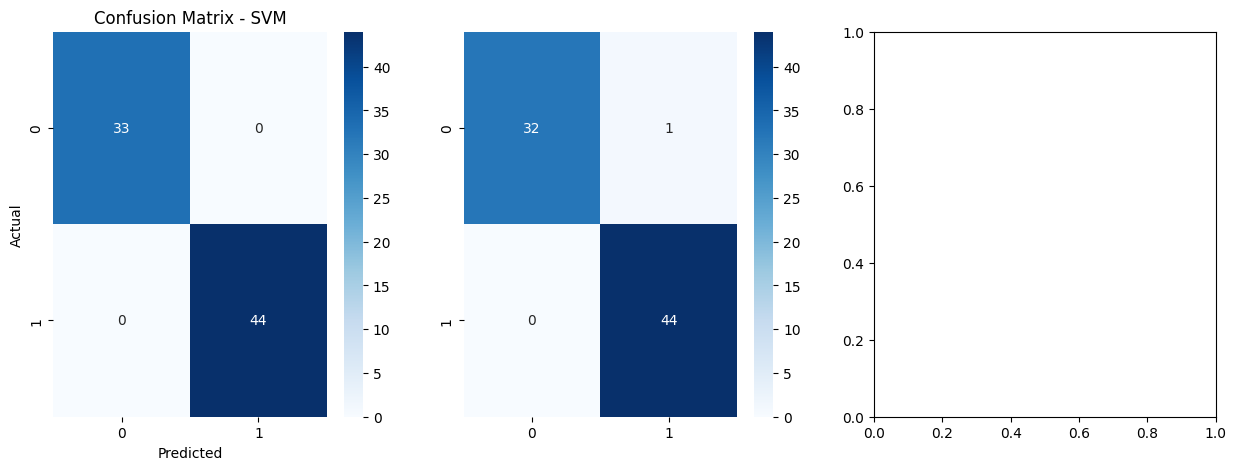

In [915]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#  Create confusion matrices and plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
classifiers = ["Logistic Regression", "SVM", "Random Forest"]

for i, (clf, pred) in enumerate(zip([logreg_model, svm_model, rf_model], [logreg_prediction, svm_prediction, rf_prediction])):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f"Confusion Matrix - {classifiers[i]}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.show()

In [ ]:
# import pandas as pd
# import joblib
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report
# # from sklearn.externals import joblib  # Use joblib for saving models

# # Concatenate the 'Latest 10 True Records' and 'Latest 10 False Records' DataFrames
# df_combined = pd.concat([df_true_selected_latest_10, df_false_selected_latest_10], ignore_index=True)

# # Separate features (X) and target variable (y)
# X = df_combined[['userID', 'deviceID', 'hours', 'minutes']]
# y = df_combined['eventStatus']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# # Standardize the features using StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Logistic Regression
# logreg_model = LogisticRegression(random_state=42)
# logreg_model.fit(X_train_scaled, y_train)
# y_pred_logreg = logreg_model.predict(X_test_scaled)

# # Save Logistic Regression model to a .joblib file
# joblib.dump(logreg_model, 'logreg_model.joblib')

# # SVM
# svm_model = SVC(random_state=42)
# svm_model.fit(X_train_scaled, y_train)
# y_pred_svm = svm_model.predict(X_test_scaled)

# # Save SVM model to a .joblib file
# joblib.dump(svm_model, 'svm_model.joblib')

# # Random Forest
# rf_model = RandomForestClassifier(random_state=42)
# rf_model.fit(X_train_scaled, y_train)
# y_pred_rf = rf_model.predict(X_test_scaled)

# # Save Random Forest model to a .joblib file
# joblib.dump(rf_model, 'rf_model.joblib')

# # Evaluate the models
# print("Logistic Regression:")
# print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
# print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

# print("\nSupport Vector Machine (SVM):")
# print("Accuracy:", accuracy_score(y_test, y_pred_svm))
# print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# print("\nRandom Forest:")
# print("Accuracy:", accuracy_score(y_test, y_pred_rf))
# print("Classification Report:\n", classification_report(y_test, y_pred_rf))


# **FOR TESTING**

In [910]:
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from datetime import datetime

# Load the saved models
logreg_model = joblib.load('logreg_model.joblib')
svm_model = joblib.load('svm_model.joblib')
rf_model = joblib.load('rf_model.joblib')

# Function to collect data, perform calculations, and make predictions
def predict_event_status(user_id, device_id, timestamp_str):
    # Convert the timestamp string to a pandas datetime object
    timestamp = pd.to_datetime(timestamp_str, format='%Y-%m-%d %H:%M:%S')

    # Extract hour and minute from the timestamp
    hour = timestamp.hour
    minute = timestamp.minute
    second = timestamp.second

    # Create a DataFrame with the collected data
    new_data = pd.DataFrame({
        'userID': [user_id],
        'deviceID': [device_id],
        'hours': [hour],
        'minutes': [minute],
        'seconds' : [second]
    })

    print(hour,' hours', minute,' minutes', second, 'seconds')

    # Apply label encoding to 'userID' and 'deviceID'
    # label_encoder = LabelEncoder()
    # new_data['userID'] = label_encoder.fit_transform(new_data['userID'])
    # new_data['deviceID'] = label_encoder.fit_transform(new_data['deviceID'])

    # Preprocess the new data
    scaler = StandardScaler()
    new_data_scaled = scaler.fit_transform(new_data[['userID', 'deviceID', 'hours', 'minutes','seconds']])

    # Make predictions using the loaded models
    logreg_prediction = logreg_model.predict(new_data_scaled)
    svm_prediction = svm_model.predict(new_data_scaled)
    rf_prediction = rf_model.predict(new_data_scaled)

    # Return the predictions
    return {
        'Logistic Regression Prediction': logreg_prediction[0],
        'SVM Prediction': svm_prediction[0],
        'Random Forest Prediction': rf_prediction[0]
    }

# Example usage
user_id = '2'
device_id = '0'
timestamp_str = '2023-10-18 07:00:00.001'

predictions = predict_event_status(user_id, device_id, timestamp_str)
print(predictions,)


7  hours 0  minutes 0 seconds
{'Logistic Regression Prediction': False, 'SVM Prediction': False, 'Random Forest Prediction': True}


In [ ]:
# import awswrangler as wr
# import pandas as pd
# from pathlib import Path

# wr.dynamodb.put_csv(path="Dataset_v1.5.csv", table_name="DeviceTimeStamp-zvvc26kofnethfd47fmdbb2skm-dev")
# wr.dynamodb.put_csv(path="Dataset_v1.4.csv", table_name="DeviceTimeStamp-zvvc26kofnethfd47fmdbb2skm-dev")